In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
dataset = pd.read_csv('Cluster.csv')
print(dataset.head())

          0         1         2         3         4         5         6  \
0 -2.084839 -0.471673 -0.955542 -0.567288 -0.953226 -1.510386  0.921728   
1  0.003700 -0.999118  0.202003  1.612001 -0.375642  0.378518  0.113693   
2 -1.456240  0.483522 -0.508605 -0.316406 -1.695560 -1.943310  0.299486   
3 -1.595524 -0.219744  1.039403  0.381587  0.109094 -0.155068  0.156054   
4  0.995277 -1.517259 -0.101198  1.415742 -0.054356  0.611216  0.196938   

          7  
0  0.437954  
1  1.718011  
2  0.147370  
3  0.007314  
4  0.641809  


In [3]:
print("\nColumns:", dataset.columns)


Columns: Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')


In [4]:
print("\nShape:", dataset.shape)


Shape: (1309, 8)


In [5]:
print("\nInfo:")
print(dataset.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1309 non-null   float64
 1   1       1309 non-null   float64
 2   2       1309 non-null   float64
 3   3       1309 non-null   float64
 4   4       1309 non-null   float64
 5   5       1309 non-null   float64
 6   6       1309 non-null   float64
 7   7       1309 non-null   float64
dtypes: float64(8)
memory usage: 81.9 KB
None


In [6]:
# Check for missing values and duplicates
print("\nMissing values in each column:")
missing_values = dataset.isnull().sum()
print(missing_values)

print("\nDuplicates in dataset:")
duplicates = dataset.duplicated().sum()
print(duplicates)


Missing values in each column:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

Duplicates in dataset:
601


In [7]:
# Drop duplicates
dataset.drop_duplicates(inplace=True)


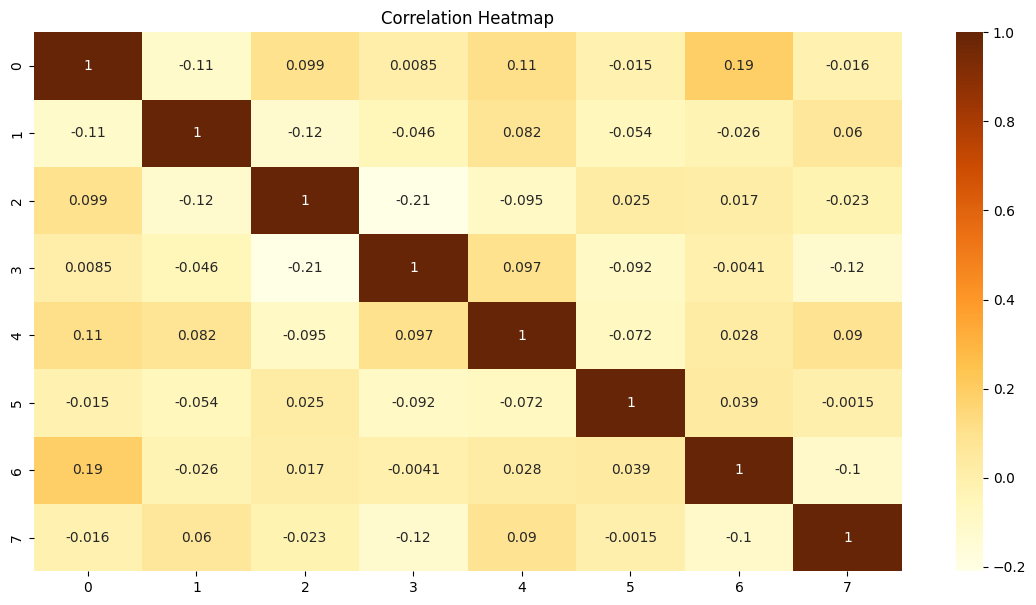

In [8]:
# Correlation heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Prepare data for clustering
x = dataset
print("\nShape of data for clustering:", x.shape)
x_train, x_test = train_test_split(x, test_size=0.25, random_state=42)



Shape of data for clustering: (708, 8)


In [10]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Determine the optimal number of clusters using the Elbow method
R = list(range(1, 10))
inertias = []

for c in R:
    kmeans = KMeans(n_clusters=c, random_state=0)
    kmeans.fit(x_train)
    inertias.append(kmeans.inertia_)
    

F:\anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
F:\anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

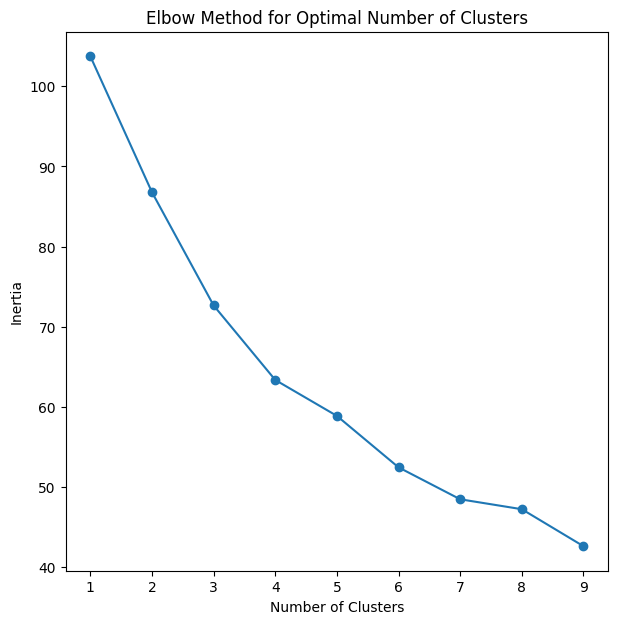

In [16]:
# Plot Elbow method results
plt.figure(figsize=(7, 7))
plt.plot(R, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Perform KMeans clustering with the optimal number of clusters 
optimal_clusters =   
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(x_train)

F:\anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
# Calculate silhouette score
silhouette_avg = silhouette_score(x_train, y_kmeans)
print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.20901898202187782
